<a href="https://colab.research.google.com/github/Buttonchick/speckle/blob/main/interferometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vidstab

  Preparing metadata (setup.py) ... done
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9612 sha256=508178891955230b966a16630fcfea9773595053dc073c8653d80f62a26960f9
  Stored in directory: /root/.cache/pip/wheels/a2/68/5f/c339b20a41659d856c93ccdce6a33095493eb82c3964aac5a1
Successfully built progress


In [ ]:

import cv2
from vidstab import VidStab

# Создание объекта стабилизатора
stabilizer = VidStab()

# Открытие видеофайла
cap = cv2.VideoCapture('/content/drive/MyDrive/спеклы/Photos/PXL_20240111_080812822~4.mp4')

# Получение размеров кадра
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Создание объекта записи стабилизированного видео
out = cv2.VideoWriter('/content/drive/MyDrive/спеклы/Photos/11011134_stabilized.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))

while(True):
    # Чтение кадра
    ret, frame = cap.read()

    # Если кадр прочитан
    if ret:
        # Стабилизация
        stabilized_frame = stabilizer.stabilize_frame(input_frame=frame)

        # Запись стабилизированного кадра
        out.write(stabilized_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
          break

    else:
        break

# Освобождение ресурсов
cap.release()
out.release()
cv2.destroyAllWindows()

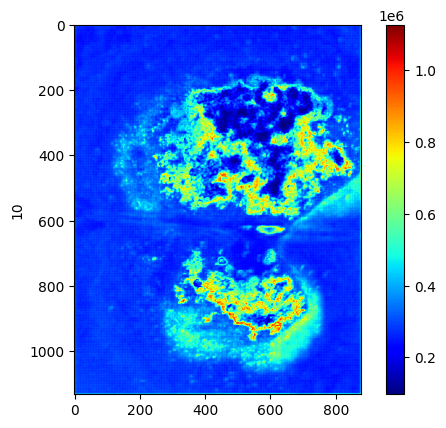

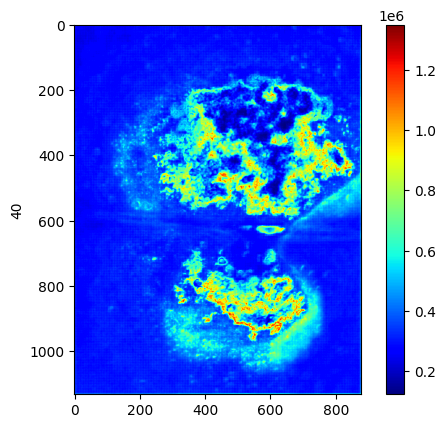

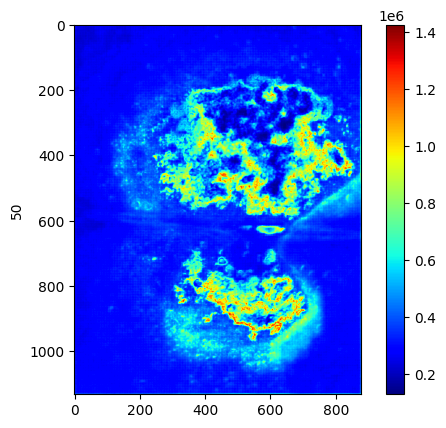

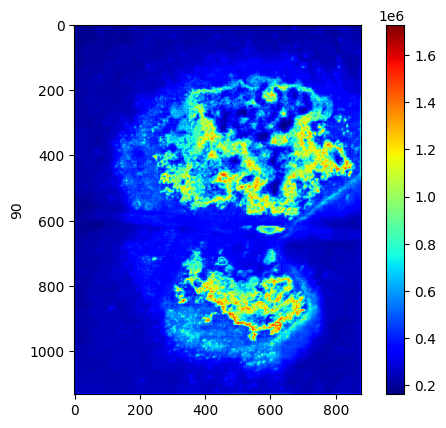

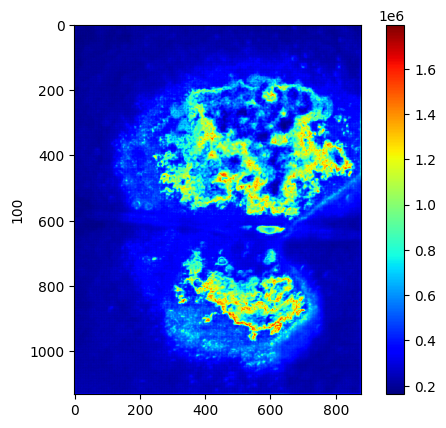

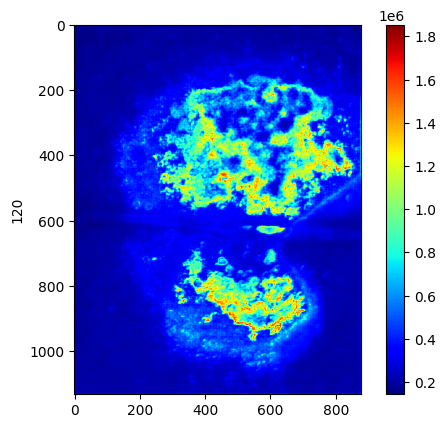

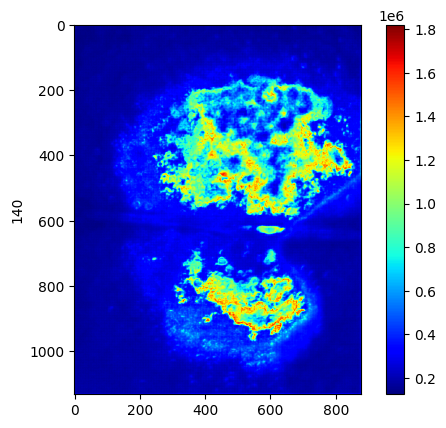

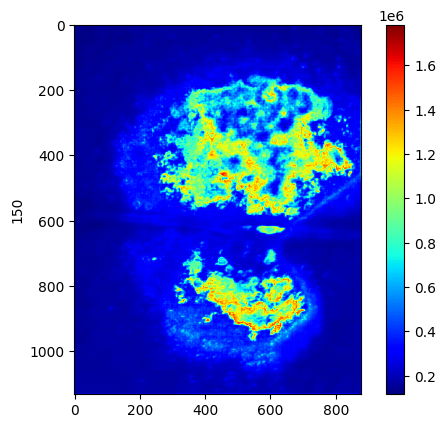

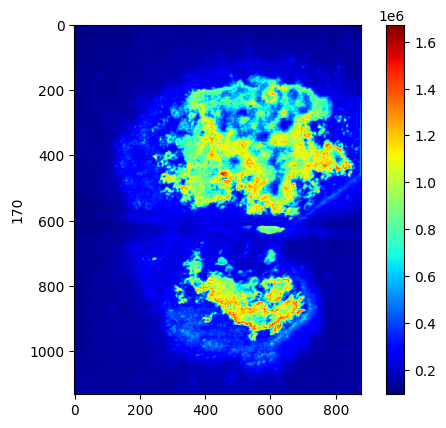

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


def compute_activity(values,gr):
    values = values.astype(np.float32)
    diff = np.abs(np.diff(values))

    activity = np.sum(
        diff * (255 - np.abs(gr - values[:-1])) +
        (255 - np.abs(gr - values[1:]))
    )

    return activity

def fujii(img, n_frames,gr):

    h, w = img.shape[:2]

    values = np.zeros((n_frames, h, w), dtype=np.uint8)

    for i in range(n_frames):
        values[i] = img[:,:,i]

    activity = np.zeros_like(values[0], dtype=np.float32)

    for y in range(h):
        for x in range(w):

           pixel_values = values[:, y, x].astype(np.float32)
           activity[y, x] = compute_activity(pixel_values,gr)

    return activity




video = cv2.VideoCapture('/content/drive/MyDrive/спеклы/Photos/v_2_avi_stabilized.avi')

num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

ret, frame = video.read()
h, w, c = frame.shape



video_array = np.zeros((h, w, num_frames), dtype=np.uint8)

for i in range(num_frames):
    ret, frame = video.read()
    if not ret:
        break
    video_array[:, :, i] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

grs = [10, 40, 50, 90, 100, 120, 140, 150,170]
for gr in grs:

  fujii_result = fujii(video_array, num_frames,gr)
  plt.figure()
  plt.imshow(fujii_result, cmap='jet')
  plt.colorbar()
  plt.axis('on')
  plt.ylabel(gr)
  plt.show()